In [7]:
# Useful libraries
import numpy as np
import pandas as pd
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
import sympy as sym

# will import the function delta_prime_solver as f
import tm_solver.solver as solver
f = solver.delta_prime_solver

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Global parameters
T = 5 # ratio between the toroidal component and the major radius (see the def of q)
m = 2 # number of poloidal Fourier modes
n = 1 # number of toroidal Fourier modes
q_0 = '1.2' 

$\textbf{NOTE}$ : It's important that for each $r_{0}$, the $q$ profile still crosses the value $q=2$ where the singularity is. This is the case for then scan below.

In [9]:
# Creating the r_0 coeff as string in order to use delta_prime_solver() (i.e f) for each one
r_0_list = np.linspace(0.2, 1.2, 100)
r_0_list_str = [str(num) for num in r_0_list]

constructing $q(r) = q_{0}\left[1+\left(\frac{r}{r_{0}}\right)^{2}\right]$ with fixed $q_{0}$ and by scanning $r_{0}$

In [11]:
# Creating all q profile with the r_0s
q_profile_str_r_0 = []

for i in range(len(r_0_list_str)):
    q_profile_str_r_0.append(q_0+'*(1+(r/'+r_0_list_str[i]+')**2)')

In [12]:
# Computing the delta_prime for each q profile
delta_primes_r_0 = []

for i in range(len(q_profile_str_r_0)):
    delta_primes_r_0.append(f(T, m, n, q_profile_str_r_0[i]))

Text(0, 0.5, "$\\Delta'$")

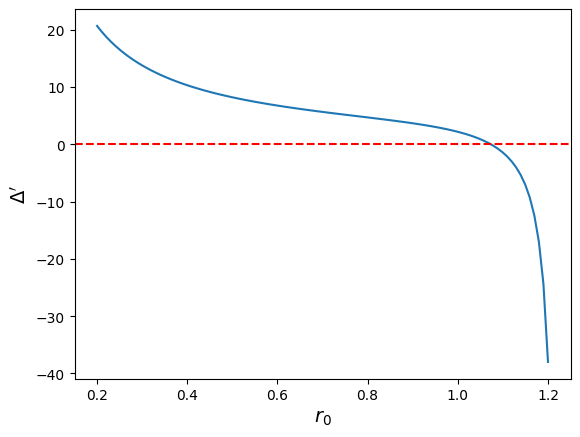

In [13]:
# Plotting the delta_prime as a function of r_0
plt.plot(r_0_list, delta_primes_r_0)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel(r'$r_{0}$', fontsize=14)
plt.ylabel(r"$\Delta'$", fontsize=14)